# Projeto 3 - Ciência dos Dados

Nome: Lara Christine Melo Vasconcelos

Nome: João Lucas Brasileiro

Nome: Yamandú Germano

Nome: Silas André Pereira

Nome: Enzo Christofoletti

___
Carregando algumas bibliotecas:

In [156]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [157]:
dados = pd.read_csv('dados_filtrados.csv',sep=';').dropna()
dados.head(5)

,vacina_descricao_dose,paciente_idade,paciente_racaCor_valor,paciente_endereco_uf,vacina_categoria_nome,paciente_enumSexoBiologico
0,1ª Dose,38.0,AMARELA,SP,Faixa Etária,M
1,3ª Dose,5.0,BRANCA,RS,Faixa Etária,M
2,1ª Dose,48.0,SEM INFORMACAO,SP,Faixa Etária,M
3,1ª Dose,77.0,SEM INFORMACAO,MG,Faixa Etária,F
4,Reforço,63.0,SEM INFORMACAO,SP,Faixa Etária,M


In [158]:
# Processamento de dados
import pandas as pd
import numpy as np

# Usado no modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import seaborn as sns

# Graficos que ilustram o modelo
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [159]:
uf = pd.get_dummies(dados["paciente_endereco_uf"],drop_first=True).reset_index(drop=True)
sexobio = pd.get_dummies(dados["paciente_enumSexoBiologico"],drop_first=True).reset_index(drop=True)
cor = pd.get_dummies(dados["paciente_racaCor_valor"],drop_first=True).reset_index(drop=True)
categoria = pd.get_dummies(dados["vacina_categoria_nome"],drop_first=True).reset_index(drop=True)

FeaturesProcessadas = pd.concat([
    dados['paciente_idade'].reset_index(drop=True),
    uf,
    sexobio,
    cor,
    categoria
    ], axis=1)

FeaturesProcessadas.columns = FeaturesProcessadas.columns.astype(str)


TargetProcessado = dados["vacina_descricao_dose"].reset_index(drop=True)



print(len(FeaturesProcessadas))
print(len(TargetProcessado))


994907
994907


In [160]:
display(FeaturesProcessadas)

,paciente_idade,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,População Privada de Liberdade,Povos Indígenas,Povos e Comunidades Tradicionais,Puérperas,Trabalhadores Industriais,Trabalhadores Portuários,Trabalhadores da Educação,Trabalhadores de Limpeza Urbana,Trabalhadores de Saúde,Trabalhadores de Transporte
0,38.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,48.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,77.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,63.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994902,58.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
994903,54.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
994904,21.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
994905,66.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

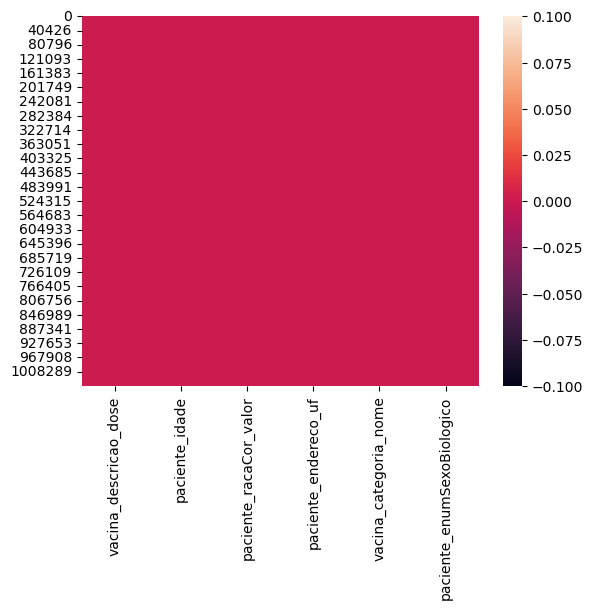

In [161]:
sns.heatmap((dados.isna()))


In [162]:
# Separando o banco de dado de treino e teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(FeaturesProcessadas,TargetProcessado, test_size=.3)



In [163]:
display(X_teste)

,paciente_idade,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,População Privada de Liberdade,Povos Indígenas,Povos e Comunidades Tradicionais,Puérperas,Trabalhadores Industriais,Trabalhadores Portuários,Trabalhadores da Educação,Trabalhadores de Limpeza Urbana,Trabalhadores de Saúde,Trabalhadores de Transporte
334281,36.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
784955,62.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
170165,25.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
719339,58.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
825486,53.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836795,15.0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
873307,76.0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
981066,73.0,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
156179,32.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [164]:
# Treinando o modelo.
rf = RandomForestClassifier()
rf.fit(X_teste, y_teste)


RandomForestClassifier()